In [1]:
using Random
include("src/plotting_utils.jl")
include("src/guillotine_utils.jl")

sorted2midpoints (generic function with 1 method)

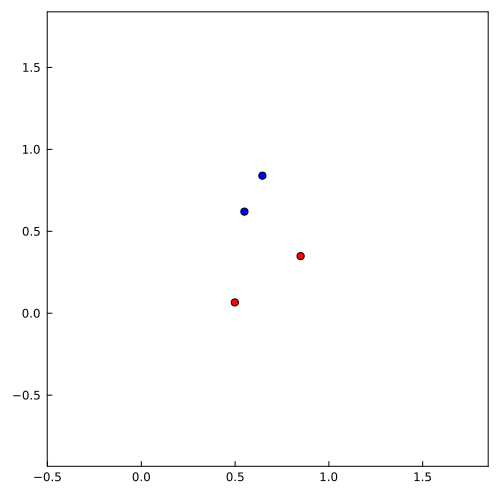

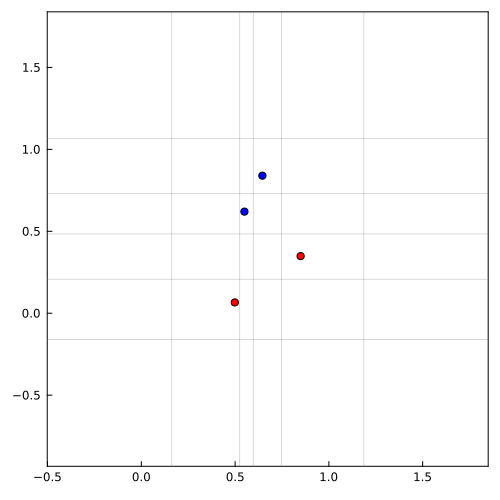

In [39]:
n = 4

S = rand(n,2)
w = rand([-1,1], n)

plt = plot_rb_points(S, w)
display(plt)
plot_add_lines!(plt, S)

4×4 Matrix{Any}:
 1  0.5   0.07  'r'
 2  0.85  0.35  'r'
 3  0.65  0.84  'b'
 4  0.55  0.62  'b'


p = 1, q = 2, i = 3, j = 3
--------------------------
                      1  2  3  4  5    midpoint index
sortperm_x          = [1, 4, 3, 2]
sortperm_x[p:p+i-1] = [1, 4, 3]

                      1  2  3  4  5    midpoint index
sortperm_y          = [1, 2, 4, 3]
sortperm_y[q:q+j-1] = [2, 4, 3]

intersection = [4, 3]

     1  2   3   4    point index
w = [1, 1, -1, -1]

Disc_pqij  = abs(sum(w[intersection])) = 2
Count_pqij = length(intersection)      = 2


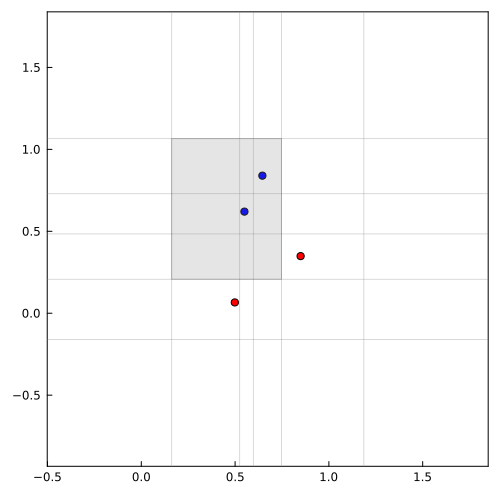

In [41]:
sortperm_x = sortperm(S[:, 1])
sorted_x = S[sortperm_x, 1]
midpoints_x = sorted2midpoints(sorted_x)

sortperm_y = sortperm(S[:, 2])
sorted_y = S[sortperm_y, 2]
midpoints_y = sorted2midpoints(sorted_y)

p = 1; q = 2; i = 3; j = 3;

M = Matrix{Any}(undef,n,4); M[:,1] = 1:n; M[:,2:3]= round.(S,digits=2); foo(x) = x==1 ? 'r' : 'b'; M[:,4] = foo.(w) 
display(M)

println("\np = $p, q = $q, i = $i, j = $j\n--------------------------")
print("                      "); for i=1:n+1 print(i,"  ") end; print("  midpoint index\n")
println("sortperm_x          = $sortperm_x")
println("sortperm_x[p:p+i-1] = $(sortperm_x[p:p+i-1])\n")
print("                      "); for i=1:n+1 print(i,"  ") end; print("  midpoint index\n")
println("sortperm_y          = $sortperm_y")
println("sortperm_y[q:q+j-1] = $(sortperm_y[q:q+j-1])\n")


int = intersect(sortperm_x[p:p+i-1],sortperm_y[q:q+j-1])
println("intersection = $int\n")

print("     "); for i=1:n print((w[i]==-1 ? " " : ""),i,"  ") end; print("  point index\n")
println("w = $w\n" )
println("Disc_pqij  = abs(sum(w[intersection])) = $(abs(sum(w[int])))")
println("Count_pqij = length(intersection)      = $(length(int))")

plot_rb_points(S, w)
plot_add_lines!(plt, S)
xx = [midpoints_x[p], midpoints_x[p], midpoints_x[p+i], midpoints_x[p+i]]
yy = [midpoints_y[q], midpoints_y[q+j], midpoints_y[q+j], midpoints_y[q]]
plot!(Shape(xx,yy), color=:gray, alpha = .2)

In [42]:
Disc_pqij(p,q,i,j) = abs(sum(w[intersect(sortperm_x[p:p+i-1],sortperm_y[q:q+j-1])]))
Count_pqij(p,q,i,j) = length(intersect(sortperm_x[p:p+i-1],sortperm_y[q:q+j-1]))

Count_pqij (generic function with 1 method)

In [50]:
inf = 100
C = 100*ones(Int,n,n,n,n)
for p=1:n
    for q=1:n
        if Count_pqij(p,q,1,1) != 0
            C[p,q,1,1] = Disc_pqij(p,q,1,1)
        end
    end
end

In [51]:
pyramidprint(C)



--------------------------------------   i = 1
                                 j = 1
 100 100   1 100
 100   1 100 100
 100 100 100   1
   1 100 100 100
                                 j = 2
 100 100 100 100
 100 100 100 100
 100 100 100 100
                                 j = 3
 100 100 100 100
 100 100 100 100
                                 j = 4
 100 100 100 100
--------------------------------------   i = 2
                                 j = 1
 100 100 100
 100 100 100
 100 100 100
 100 100 100
                                 j = 2
 100 100 100
 100 100 100
 100 100 100
                                 j = 3
 100 100 100
 100 100 100
                                 j = 4
 100 100 100
--------------------------------------   i = 3
                                 j = 1
 100 100
 100 100
 100 100
 100 100
                                 j = 2
 100 100
 100 100
 100 100
                                 j = 3
 100 100
 100 100
                                 j = 4
 100 100

In [49]:
function pyramidprint(C,label="",io="")
    println(io,"\n"*label)
    for i = 1:n
        println(io,"--------------------------------------   i = $i")
        for j = 1:n
            println(io,"                                 j = $j")
            for q = n-j+1:-1:1
                for p = 1:n-i+1
                    print(io,lpad(C[p,q,i,j], 4, " "))
                end
                println(io,"")
            end

        end
    end
    println(io,"--------------------------------------\n")
end

pyramidprint (generic function with 3 methods)